### Multi template & Fixed Coordinate 

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os 
import time
# from jupyterthemes import jtplot
# jtplot.style('onedork',grid=False,figsize=(8.0, 9.0)) #畫圖風格

start_time=time.time()
value= 0.8
input_path ='./IDVideo/2021-04-12 13-45-25.mp4'
Target= './template/'
output_path  = './predict/'

# Read file folder
image_paths = []
if os.path.isdir(input_path): 
    for inp_file in os.listdir(input_path):
        image_paths += [input_path + inp_file]
else:
    image_paths += [input_path]
image_paths = [inp_file for inp_file in image_paths if (inp_file[-4:] in ['.jpg', '.png', '.JPG','jpeg'])]

# Read template folder
template_paths = []
if os.path.isdir(Target): 
    for inp_file in os.listdir(Target):
        template_paths += [Target + inp_file]
else:
    template_paths += [Target]
template_paths = [inp_file for inp_file in template_paths if (inp_file[-4:] in ['.jpg', '.png', '.JPG','jpeg'])]

# the main loop
for temp in template_paths:
    for image_path in image_paths:   
        name=os.path.basename(image_path)
        img_rgb = cv2. imread (image_path) 
        img_gray = cv2. cvtColor (img_rgb, cv2. COLOR_BGR2GRAY) 
        template = cv2. imread(temp,0) 
        w, h = template. shape[ ::-1 ] 
    #     print('w:{}\nh:{}'.format(w,h))
        res = cv2. matchTemplate(img_gray ,template,cv2. TM_CCOEFF_NORMED) 
        threshold = value 
        loc = np.where(res >=threshold) 
        if np.asarray(loc[0]).size>0: #if have object,plt image；loc tuple transfer to array
            for pt in zip (* loc [ ::- 1 ]): 
                cv2. rectangle (img_rgb, pt, ( pt [ 0 ] + w, pt [ 1 ] + h ) , ( 7 , 249 , 151 ) , 2 ) 

            x=325 #截圖左上角 x座標
            y=86  #截圖左上角 y座標
            plt.imshow (img_rgb) 
            plt.title('Raw_Image')
#             cv2.imwrite(output_path +'Screen_'+name+'.jpg', img_rgb)
            plt.show()
            #cut object from raw image
            crop_img = img_rgb[y:y+h,x:x+w]
            plt.title('Target_Image')
            cv2.imwrite(output_path +'Target_'+name+'.jpg', crop_img)
            plt.imshow(crop_img)
            plt.show()
        else:
            continue

end_time=time.time()
print('Time:',end_time-start_time)

Time: 0.0


### WebCam with MatchTemplate

Start....


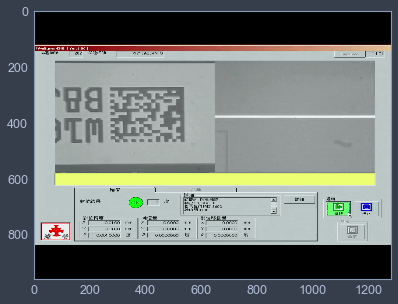

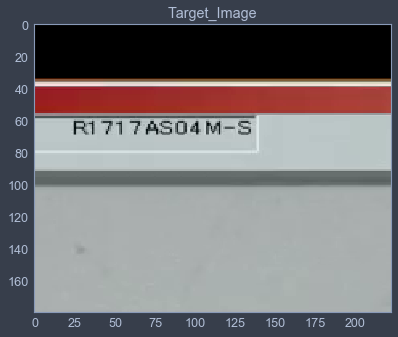

END
Time: 0.8566794395446777


In [3]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os 
import time
import datetime
# from jupyterthemes import jtplot
# jtplot.style('onedork',grid=False,figsize=(8.0, 9.0)) #畫圖風格
start_time=time.time()
time_F = 60 #cut frame 
value=0.3

input_path   = './IDVideo/2021-04-12 13-45-25.mp4'
output_path  = './predict/'
Target= './template/'

# Read template folder
template_paths = []
if os.path.isdir(Target): 
    for inp_file in os.listdir(Target):
        template_paths += [Target + inp_file]
else:
    template_paths += [Target]
template_paths = [inp_file for inp_file in template_paths if (inp_file[-4:] in ['.jpg', '.png', '.JPG','jpeg'])]

vc = cv2.VideoCapture(input_path) #Read File
# vc = cv2.VideoCapture(0) #Read webcam

if vc.isOpened():#判斷是否開啟影片
    rval, video_frame = vc.read()
    print('Start....')
    #顯示
    plt.imshow(video_frame)
    plt.show()
else:
    rval=False  
c=0
while rval:#擷取視頻至結束
    rval,video_frame = vc.read()
    if(c % time_F == 0): #每隔幾幀進行擷取,  
        for temp in template_paths:
            image = video_frame
            img_rgb = image
            img_gray = cv2. cvtColor (img_rgb, cv2. COLOR_BGR2GRAY) 
            template = cv2. imread(temp,0) 
            w, h = template. shape[ ::-1 ] 
        #     print('w:{}\nh:{}'.format(w,h))
            res = cv2. matchTemplate(img_gray ,template,cv2. TM_CCOEFF_NORMED) 
            threshold = value 
            loc = np.where(res >=threshold) 
            if np.asarray(loc[0]).size>0: #if have object,plt image；loc tuple transfer to array
                for pt in zip (* loc [ ::- 1 ]): 
                    cv2. rectangle (img_rgb, pt, ( pt [ 0 ] + w, pt [ 1 ] + h ) , ( 7 , 249 , 151 ) , 2 ) 

                x=325 #截圖左上角 x座標
                y=86  #截圖左上角 y座標
#                 plt.imshow (img_rgb) 
#                 plt.title('Raw_Image')
#                 cv2.imwrite(output_path +'Screen_'+name+'.jpg', img_rgb)
#                 plt.show()
                #cut object from raw image
                crop_img = img_rgb[y:y+h,x:x+w]
                ss=datetime.datetime.now().strftime('%Y-%m-%d %H%M%S.%f')
#                 cv2.imwrite(output_path +'Target_'+ss+'.jpg', crop_img)
                plt.title('Target_Image')
                plt.imshow(crop_img)
                plt.show()
            else:
                continue
    c=c+1        

end_time=time.time()
print('END')
print('Time:',end_time-start_time)